<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Affine-Transformation/Affine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Affine on  the Image

Affine transformation is a linear mapping method that preserves points, straight lines, and planes. Sets of parallel lines remain parallel after an affine transformation.

The affine transformation technique is typically used to correct for geometric distortions or deformations that occur with non-ideal camera angles. For example, satellite imagery uses affine transformations to correct for wide angle lens distortion, panorama stitching, and image registration. Transforming and fusing the images to a large, flat coordinate system is desirable to eliminate distortion. This enables easier interactions and calculations that don’t require accounting for image distortion.

The following table illustrates the different affine transformations: translation, scale, shear, and rotation.

<img src="https://github.com/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Affine-Transformation/img/87878787887.PNG?raw=true" width="85%">

#### If you want to see your output image in the frame so you will have to enter your parameters according to the following table :

|       | angle of rotate | translation of X,Y | scale of X,Y   | sheer of X,Y
|-------|:----------------|:-------------------|:---------------|:------------
|offer1 | 30 degree       |  X,Y=0.7           |X=110 , Y=0     | X=0 , Y=0
|offer2 | 30 degree       |  X,Y=0.7           |X=-40 , Y=0     | X=0 , Y=1
|offer3 | 45 degree       |  X,Y=0.7           |X=140 , Y=0     | X=0 , Y=0
|offer4 | 45 degree       |  X,Y=0.7           |X=0   , Y=0     | X=0 , Y=1
|offer5 | 60 degree       |  X,Y=0.7           |X=185 , Y=15    | X=0 , Y=0
|offer6 | 60 degree       |  X,Y=0.7           |X=170  , Y=-100 | X=1 , Y=0

In [62]:
o = input("plz enter which do you want affering according above table, for example : offer1 or offer2 , ... --> you chose ")

plz enter which do you want affering according above table, for example : offer1 or offer2 , ... --> you chose offer4


--2020-12-17 00:43:03--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.114.164.252, 2606:4700::6812:eb0, 2606:4700::6812:fb0
Connecting to i.pinimg.com (i.pinimg.com)|104.114.164.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.03s   

2020-12-17 00:43:03 (4.30 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



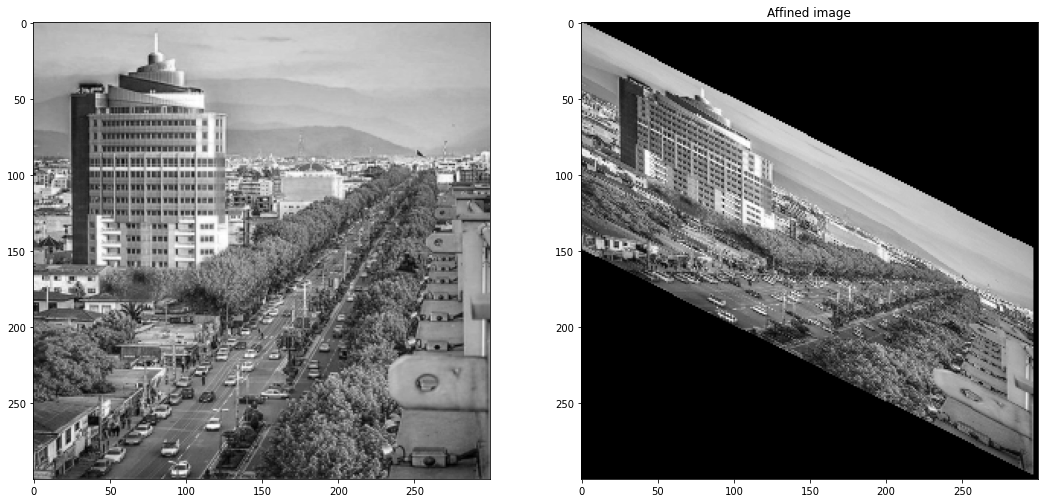

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

def Affine(rotate,scale,xt,yt,xs,ys):
    Rotate = np.matrix([[np.cos(rotate),np.sin(rotate),0],
                 [np.sin(-rotate),np.cos(rotate),0],
                 [0,0,1]])
    
    Scale = np.matrix([[scale,0,0],
                     [0,scale,0],
                     [0,0,1]])
    
    Translation = np.matrix([[1,0,0],
                           [0,1,0],
                           [yt,xt,1]])
    
    Sheer = np.matrix([[1,ys,0],
                     [xs,1,0],
                     [0,0,1]])

    return Rotate,Scale,Translation ,Sheer

if o[5] == '1':
  x=1
elif o[5] == '2':
  x=2
elif o[5] == '3':
  x=3
elif o[5] == '4':
  x=4
elif o[5] == '5':
  x=5
elif o[5] == '6':
  x=6

O = np.array([["rotate as radians", "scale as X,Y", "translation_X", "translation_Y" , "sheer_X", "sheer_Y"],
              [0.523, 0.7, 110, 0 , 0, 0],
              [0.523, 0.7, -40, 0 , 0, 1],
              [0.785, 0.7, 140, 0 , 0, 0],
              [0.785, 0.7, 0  , 0 , 0, 1],
              [1.04, 0.7, 185, 15, 0, 0],
              [1.04, 0.7, 170 , -100 , 1, 0]])

Rotate,Scale,Translation ,Sheer = Affine(float(O[x][0]),float(O[x][1]),float(O[x][2]),float(O[x][3]),float(O[x][4]),float(O[x][5]))

!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

img = cv.imread('AMOL_IRAN.jpg')
img = cv.resize(img, (300,300), interpolation = cv.INTER_AREA)
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img = np.array(img)

m=img.shape[0]
n=img.shape[1]
out_img=np.zeros([m,n])

for i in range(0,m):
  for j in range(0,n):
    g = np.array([i,j,1])
    s1 = np.dot(Rotate,Scale)
    s2 = np.dot(s1,g)
    s2 = np.dot(s2,Translation)
    s2 = np.dot(s2,Sheer)

    if m-1 > s2[0,0] > 0.0 and n-1 > s2[0,1] > 0.0 :
       X = int(round(s2[0,0]))
       Y = int(round(s2[0,1]))
       out_img[[X],[Y]] = img[[i],[j]]

qq,(vector1, vector2) = plt.subplots(1,2,figsize = (18,13))
vector1.imshow(img, cmap='gray')
plt.title('Affined image')
vector2.imshow(out_img, cmap='gray')
plt.show()